# Проект
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

Ход работы:
- Часть 1. Приоритизация гипотез.
    - Примените фреймворк ICE, RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Часть 2. Анализ A/B-теста
    - Постройте график кумулятивной выручки, кумулятивного среднего количества заказов и кумулятивного среднего чека по группам
    - Постройте график относительного изменения кумулятивного среднего чека и относительного изменения кумулятивного среднего количества заказов группы B к группе A
    - Постройте точечный график количества заказов по пользователям, точечный график стоимостей заказов.
    - Посчитайте 95-й и 99-й перцентили количества заказов на пользователя и стоимости заказов
    - Посчитайте статистическую значимость различий в среднем количестве заказов, в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
    - Посчитайте статистическую значимость различий в среднем количестве заказов, в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
    - Примите решение по результатам теста и объясните его.    
    


## Приоритизация гипотез.

In [1]:
# импортируем библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# считываем файл

data = pd.read_csv('/datasets/hypothesis.csv')
data.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
data['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

In [4]:
pd.options.display.max_colwidth = 100
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
# проверим инфо по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
# приведем к нижнему регистру для удобства
data.columns = data.columns.str.lower()

In [7]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [8]:
# посчитаем ICE для гипотез

data['ICE'] = ((data['impact'] * data['confidence']) / data['efforts']).round(2)
data

,hypothesis,reach,impact,confidence,efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20


In [9]:
# отсортируем таблицу по колонке ICE
data.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Видно, что наиболее перспективные гипотезы по ICE - 8-"Запустить акцию, дающую скидку на товар в день рождения", 0-"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и 7-"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

In [10]:
# Посчитаем RICE для гипотез

data['RICE'] = ((data['reach'] * data['impact'] * data['confidence']) / data['efforts'])
data

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


In [11]:
# отсортируем таблицу по колонке RICE
data.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


А по расчитанному RICE - приоритетными гипотезами стали: 7-"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", 2-"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек", 0- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", 6-"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".

При применении фреймворка RICE приоритеты поменялись из-за параметра reach, у гипотезы под номером 7 - он самый большой. У прежнего "лидера" по ICE - гипотезы №8 - параметр reach = параметру efforts, один параметр находится в числителе, а другой в знаменателе.

##  Анализ A/B-теста

In [12]:
# прочтём данные из файлов с результатами A/B-тестирования
orders = pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [13]:
# преобразуем столбец с датой

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [14]:
# прочтём данные из файлов с результатами A/B-тестирования

visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [15]:
# преобразуем столбец с датой

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [16]:
# проверим дубликаты

orders.duplicated().sum()


0

In [17]:
# проверим дубликаты
visitors.duplicated().sum()

0

In [18]:
# проверим пропуски
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [19]:
# проверим пропуски
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [20]:
# проверим есть ли пользователи, попавшие в обе группы

np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

Пропусков и дубликатов нет, но есть пользователи, попавшие в обе группы одновременно.

### Постройте график кумулятивной выручки по группам

In [21]:
# чтобы построить графики, нужно собрать кумулятивные данные



# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

datesGroups


,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [22]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

ordersAggregated
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [23]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# посмотрим как выглядит
cumulativeRevenueA.head()


,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


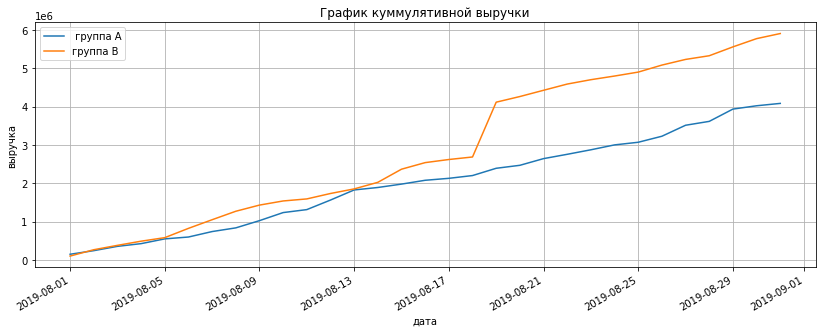

In [25]:
# Строим график выручки группы А и В

fig, ax = plt.subplots()
ax.grid()
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label=' группа A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B');
ax.xaxis_date()    
fig.autofmt_xdate() 
ax.legend();
ax.set_title('График куммулятивной выручки');
ax.set_xlabel('дата')
ax.set_ylabel('выручка')
fig.set_figheight(5)
fig.set_figwidth(14)

plt.show()



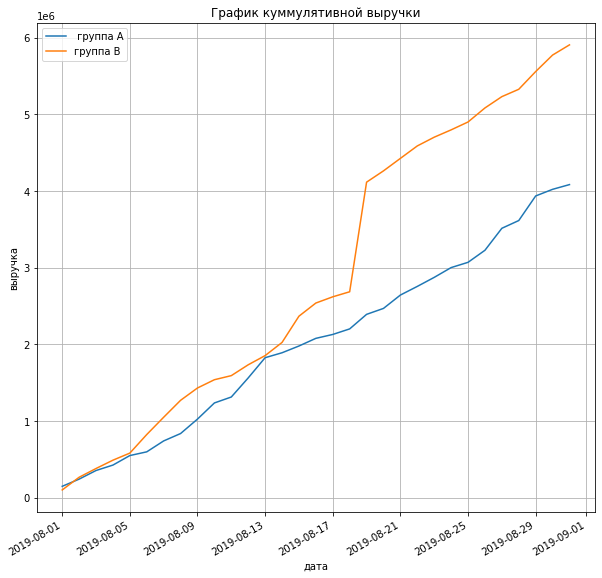

In [33]:
# Строим график выручки группы А и В

fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label=' группа A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B');
ax.xaxis_date()    
fig.autofmt_xdate() 
ax.legend();
ax.set_title('График куммулятивной выручки');
ax.set_xlabel('дата')
ax.set_ylabel('выручка')

plt.show()


Выручка почти равномерно увеличивается в течение всего теста, но графики  обеих групп в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Но стоит отметить, что у группы В выручка растет быстрее

### Постройте график кумулятивного среднего чека по группам.

In [26]:
# средний чек — кумулятивная выручка, деленная на кумулятивное число заказов

avg_receiptA = cumulativeRevenueA['revenue']/cumulativeRevenueA['orders']
avg_receiptB = cumulativeRevenueB['revenue']/cumulativeRevenueB['orders']

avg_receiptA.head()

0    6190.791667
2    5509.113636
4    5218.735294
6    5067.845238
8    5045.110092
dtype: float64

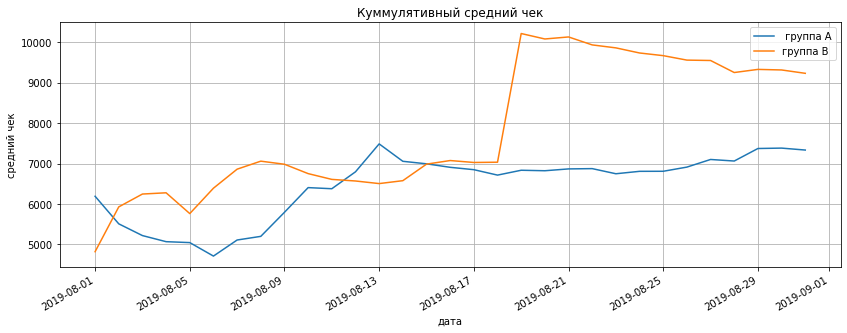

In [27]:
# построим графики

fig, ax = plt.subplots()
ax.grid()
ax.plot(cumulativeRevenueA['date'], avg_receiptA, label=' группа A' )
ax.plot(cumulativeRevenueB['date'], avg_receiptB, label='группа B' )
ax.xaxis_date()    
fig.autofmt_xdate() 
ax.legend();
ax.set_title('Куммулятивный средний чек');
ax.set_xlabel('дата')
ax.set_ylabel('средний чек')
fig.set_figheight(5)
fig.set_figwidth(14)

plt.show()



У группы В был аномальный всплеск среднего чека - думаю, это связано с крупным/дорогим заказом. После резкого скачка наблюдается тенденция к спаду. У группы А также был  резкий подьем, но небольшой, после него средний чек установился, но к концу наблюдения немного растет. Но на протяжении всего наблюдения средний чек группы В выше, чем у группы А

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.

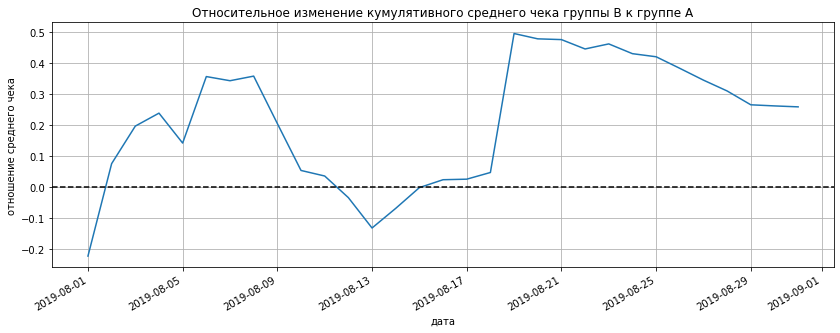

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
fig, ax = plt.subplots()
ax.grid()
ax.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
ax.axhline(y=0, color='black', linestyle='--');

ax.set_title('Относительное изменение кумулятивного среднего чека группы B к группе A');
ax.xaxis_date()    
fig.autofmt_xdate() 
ax.set_xlabel('дата')
ax.set_ylabel('отношение среднего чека')
fig.set_figheight(5)
fig.set_figwidth(14)

plt.show()




В двух местах на графике виднеются огромные пики - дело в крупных заказах или выбросах. Далее нужно будет этим заняться

### Постройте график кумулятивного среднего количества заказов по группам.

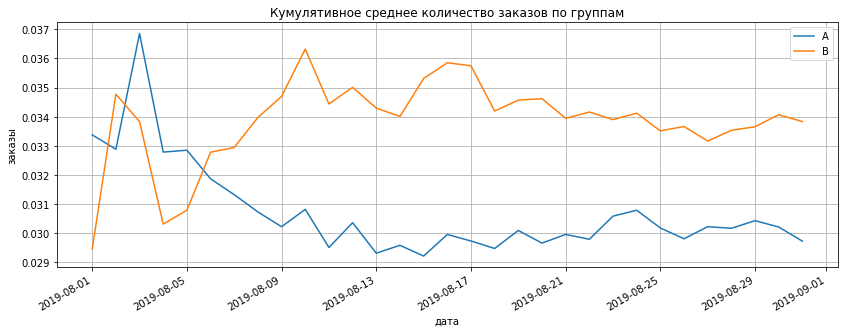

In [29]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики

fig, ax = plt.subplots()
ax.grid()
ax.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
ax.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
ax.legend();
ax.set_title('Кумулятивное среднее количество заказов по группам');
ax.xaxis_date()    
fig.autofmt_xdate() 
ax.set_xlabel('дата')
ax.set_ylabel('заказы')
fig.set_figheight(5)
fig.set_figwidth(14)

plt.show()



В начале наблюдения конверсия группы А росла лучше, но после своего пика начала стремительно падать и скатилась вниз. У группы В в начале также наблюдался пик, с последующим спадом, но после него конверсия снова возрасла и держится примерно на одном уровне

### Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A.

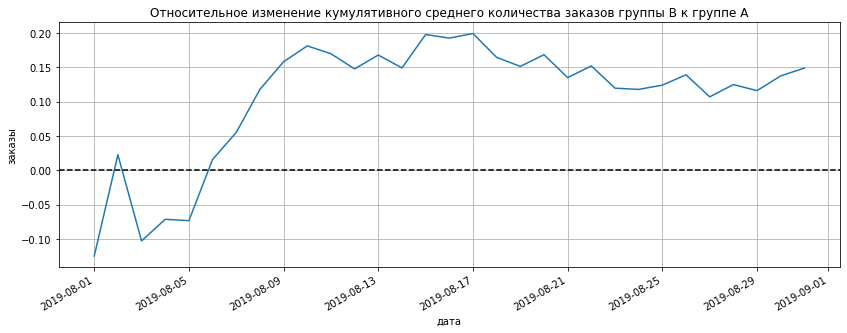

In [30]:
# cтроим отношение средних чеков

fig, ax = plt.subplots()
ax.grid()
ax.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/(mergedCumulativeRevenue['ordersA'])-1))

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

ax.set_title('Относительное изменение кумулятивного среднего количества заказов группы B к группе A');
ax.xaxis_date()    
fig.autofmt_xdate() 
ax.set_xlabel('дата')
ax.set_ylabel('заказы')
fig.set_figheight(5)
fig.set_figwidth(14)

plt.show()




Количество заказов у группы В явно преобладают над заказами группы А. Однако, в начале даже имелся недолгий период, когда заказы группы В были меньше, но затем случился резкий всплеск, и заказы больше не падали

### Постройте точечный график количества заказов по пользователям.

In [31]:
# создадим новую таблицу из пользователей и количества заказов
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))

ordersByUsers

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [32]:
# переименуем колонки
ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)


,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


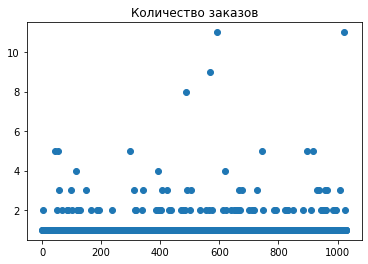

In [33]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter( x=x_values, y=ordersByUsers['orders'],);
plt.title('Количество заказов');


Пользователей, совершивших более двух заказов - мало. Будем анализировать дальше

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [34]:
# найдем перцентили
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Итого - не более 5% пользователей совершили более двух заказов, и не более 1% совершили более 4х заказов. Будем считать, что всё, что больше двух заказов - аномалии

### Постройте точечный график стоимостей заказов.

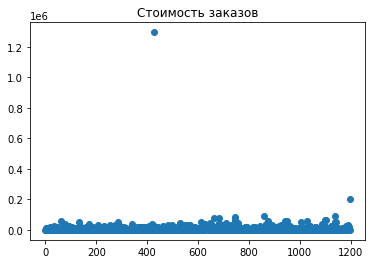

In [35]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Стоимость заказов');

По графику всего лишь два дорогостоящих заказа. Предварительно, можно их считать за аномалии

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [36]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 и не более 1% заказов дороже 58233. Будем считать, что всё, что больше 28000 - аномалии

### Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Посмотрим на таблицы, которые будем использовать. Сделаем из них одну общую 

In [37]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [38]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [39]:
# рассчитаем количество пользователей в день в группе А

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [40]:
# посчитаем куммулятивные показатели: общее кол-во пользователей

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [41]:
# тоже самое для группы В

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [42]:
# количество заказов и средний чек в день для группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# с накоплением
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [43]:
# всё тоже самое для группы В

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


In [44]:
# всё объединим
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [45]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [46]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [47]:
# посчитаем p-value
print('alpha = 0.05')
print('p-value', 'равно', '', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# посмотрим относительный прирост среднего числа заказов группы B:
print('относительный прирост среднего числа заказов группы B равен', '', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p-value равно  0.017
относительный прирост среднего числа заказов группы B равен  0.138


p-value меньше 0.05 - значит отвергаем нулевую гипотезу, что статистически значимых различий в среднем количестве заказов между группами нет. И относительный выигрыш по заказам у группы В - больше на 13.8%, чем у группы А.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [48]:
# посмотрим p-value
print('p-value равно', '', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# посмотрим относительные различия
print('относительное различие равно', '','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value равно  0.729
относительное различие равно  0.259


P-value больше 0.05, значит нулевая гипотеза верна, и различий в среднем чеке между группами нет.
Однако, вычисления выдали, что относительное различие между чеками равно 26%

### Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.

Снова проверим гипотезы: Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная - различия в среднем количестве заказов между группами есть. По сырым данным нулевая гипотеза была отвергнута

Обговорим, что будем подразумевать под аномальными данными. 
Мы нашли 95 перцентили по количеству заказов = 2  и по стоимости заказов = 28000.
Значит примем за аномальных пользователей тех, кто совершил больше от 3х заказов, стоимостью от 30000


In [61]:
# срез пользователей с заказами более 2х
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > (np.percentile(ordersByUsers['orders'], 95))]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > (np.percentile(ordersByUsers['orders'], 95))]['userId'],
    ],
    axis=0,
)

In [59]:
# cрезы пользователей, совершивших заказы дороже

usersWithExpensiveOrders = orders[orders['revenue'] > (np.percentile(orders['revenue'], 95))]['visitorId']

In [54]:
# объединим таблицы и посчитаем аномальных пользователей
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
68


Итого - 68 аномальных пользователей

In [55]:
# посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным
# для группы А

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleAFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18693, dtype: int64

In [56]:
# для группы B

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)
sampleBFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18872, dtype: int64

In [63]:
# применим статистический критерий Манна-Уитни
print('p-value равно', '', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительная разница равна', '', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value равно  0.013
относительная разница равна  0.172


Значение p-value немного, но уменьшилось, с 0.017 до 0.013,  а относительная разница группы В к А - увеличилась с 0.138 до 0.172. Вывод - значения практически не изменились.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Проверяем снова гипотезы: Нулевая - различий в среднем чеке между группами нет. Альтернативная - различия в среднем чеке между группами есть. По сырым данным нулевая гипотеза была верна

In [65]:
# p-value среднего чека
print('p-value равно ''{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', \
    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(orders['group'] == 'B', \
                                            np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

# относительная разница
print('относительная разница равна '"{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',\
                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]\
                ['revenue'].mean()- 1))

p-value равно 0.720
относительная разница равна -0.023


p-value незначительно уменьшился с 0.729 до 0.720, а относительная разница в среднем чеке между группами изменилась координально: с 26% по сырым данным до -2% после фильтрования

### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

По анализу данных можно сделать следующие выводы:
- присутствует статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;
- нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- по графику различия конверсии между группами видно, что результаты группы B намного лучше группы A, а конверсия группы А продолжает падать
- по графику куммулятивной выручки, среднего чека - однозначное преимущество группы В
- по графикам относительного изменения среднего чека и числа заказов - также выигрыш группы В \
Поэтому, по вышеперечисленным фактам предлагаю остановить тест и объявить победителем группу В.